In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_dir = Path(".").resolve(strict=True).parent.parent / "data"
assert data_dir.is_dir()

dataset_path = data_dir / "london_merged.csv"
assert dataset_path.is_file()

In [3]:
dataset = pd.read_csv(dataset_path)
assert not dataset.empty

In [4]:
dataset.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
dataset.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [6]:
dataset.shape

(17414, 10)

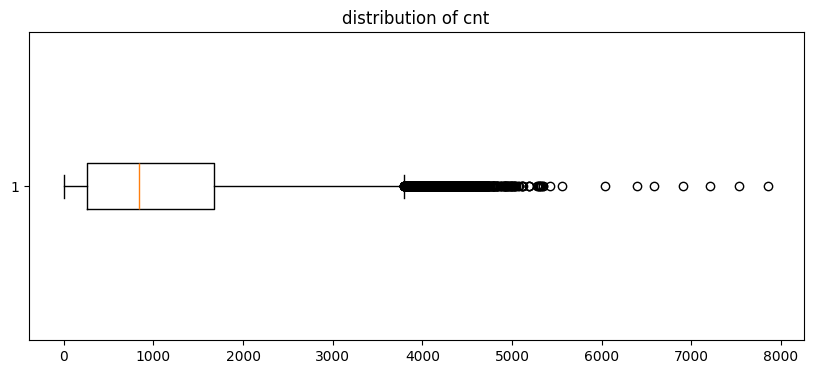

In [ ]:
# check for outliers (do not remove)
fig = plt.figure(figsize=(10, 4))
plt.boxplot(dataset["cnt"], vert=False)
plt.title("distribution of cnt")
plt.show()

In [8]:
# convert season to multiple binary features
dataset["is_spring"] = dataset["season"] == 0
dataset["is_summer"] = dataset["season"] == 1
dataset["is_fall"] = dataset["season"] == 2
dataset["is_winter"] = dataset["season"] == 3
dataset.drop(columns=["season"], inplace=True)

In [9]:
# convert weather_code to a simple binary feature
dataset["is_good_weather"] = dataset["weather_code"] <= 4  # true if clear to cloudy
dataset.drop(columns=["weather_code"], inplace=True)

In [10]:
# extract date features from timestamp
dataset["year"] = pd.to_datetime(dataset["timestamp"]).dt.year
dataset["month"] = pd.to_datetime(dataset["timestamp"]).dt.month
dataset["day"] = pd.to_datetime(dataset["timestamp"]).dt.day
dataset["hour"] = pd.to_datetime(dataset["timestamp"]).dt.hour
dataset.drop(columns=["timestamp"], inplace=True)

In [11]:
# check how each feature is correlated with the target "cnt"
dataset.corr()["cnt"]

cnt                1.000000
t1                 0.388798
t2                 0.369035
hum               -0.462901
wind_speed         0.116295
is_holiday        -0.051698
is_weekend        -0.096499
is_spring         -0.021024
is_summer          0.171869
is_fall            0.018929
is_winter         -0.170381
is_good_weather    0.156022
year               0.010046
month              0.063757
day               -0.017887
hour               0.324423
Name: cnt, dtype: float64

In [12]:
# keep the ones where the absolute correlation score is more than 0.05
dataset.corr()["cnt"][dataset.corr()["cnt"].abs() > 0.05]

cnt                1.000000
t1                 0.388798
t2                 0.369035
hum               -0.462901
wind_speed         0.116295
is_holiday        -0.051698
is_weekend        -0.096499
is_summer          0.171869
is_winter         -0.170381
is_good_weather    0.156022
month              0.063757
hour               0.324423
Name: cnt, dtype: float64